In [21]:
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
# Step 1: Preprocess the data
def preprocess_chat_data(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    chat_data = []
    for line in lines:
        line = line.strip()
        if line.count("-") >= 2:
            timestamp_end = line.index("-") - 1
            timestamp = line[:timestamp_end]
            content = line[timestamp_end + 3:]

            if ": " in content and content != "<Media omitted>":
                sender, message = content.split(": ", 1)
                chat_data.append((timestamp, sender, message))

    return chat_data

In [23]:
# Step 2: Load and structure the data
chat_file = "WhatsApp Chat with Ankita Ben.txt"  # Replace with the path to your exported chat file
chat_data = preprocess_chat_data(chat_file)
df = pd.DataFrame(chat_data, columns=["Timestamp", "Sender", "Message"])

In [24]:
df

,Timestamp,Sender,Message
0,"5/11/20, 13:32",Kastbhanjan Classes,https://snappy.appypie.com/index/app-download/...
1,"5/11/20, 23:42",Kastbhanjan Classes,https://hses.hotstar.com/videos/lifeok/dekedem...
2,"5/14/20, 11:53",Kastbhanjan Classes,https://youtu.be/MddJeam7-cc
3,"5/27/20, 16:01",Kastbhanjan Classes,Covid - 19 epass
4,"5/30/20, 12:44",Kastbhanjan Classes,https://teams.microsoft.com/l/message/19:fabc2...
...,...,...,...
132,"3/20/23, 10:58",Kastbhanjan Classes,https://www.youtube.com/live/GWExBIX-zgM?featu...
133,"3/27/23, 14:45",Kastbhanjan Classes,Azithromicyin -250 mg
134,"3/27/23, 14:46",Kastbhanjan Classes,Vitamin - C (Chewing)
135,"4/2/23, 19:59",Ankita Ben,dholakiaankita15-1@oksbi


In [25]:
# Step 3: Explore basic statistics
total_messages = len(df)
participants = df["Sender"].unique()
message_counts = df["Sender"].value_counts()
average_message_length = df["Message"].apply(len).mean()

print("Basic Statistics:")
print("Total messages:", total_messages)
print("Participants:", participants)
print("Message counts:\n", message_counts)
print("Average message length:", average_message_length)

Basic Statistics:
Total messages: 137
Participants: ['Kastbhanjan Classes' 'Ankita Ben']
Message counts:
 Kastbhanjan Classes    74
Ankita Ben             63
Name: Sender, dtype: int64
Average message length: 102.01459854014598


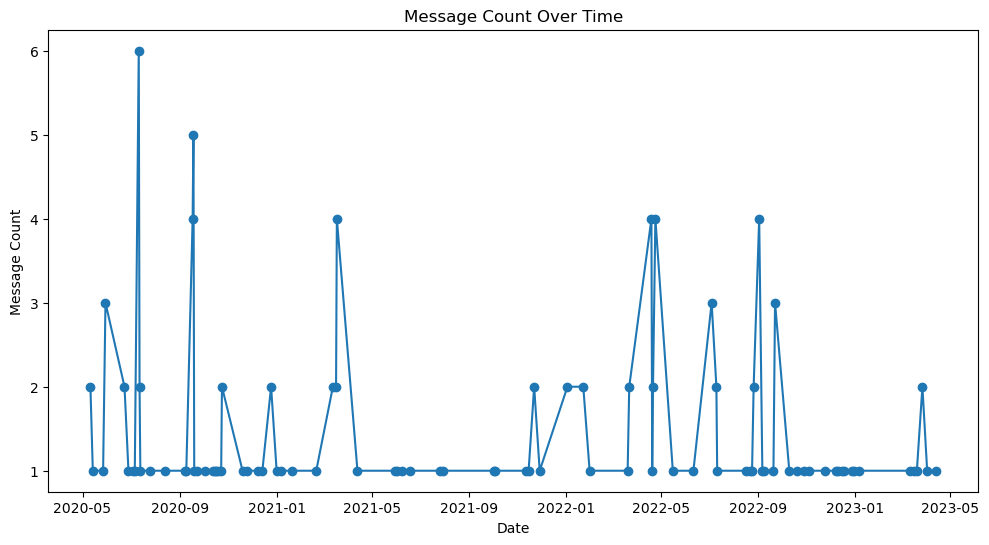

In [26]:
# Step 4: Visualize data
plt.figure(figsize=(12, 6))
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Date"] = df["Timestamp"].dt.date
message_counts_by_date = df.groupby("Date").size()
message_counts_by_date.plot(kind="line", marker="o")
plt.xlabel("Date")
plt.ylabel("Message Count")
plt.title("Message Count Over Time")
plt.show()

In [34]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...


True

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer

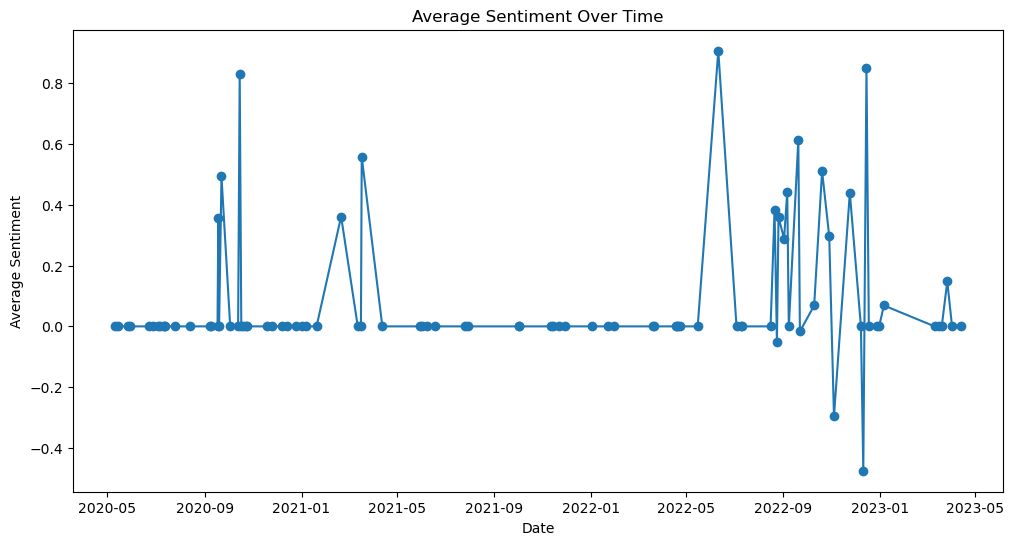

In [37]:
 #Step 4: Sentiment analysis
analyzer = SentimentIntensityAnalyzer()
df["Sentiment"] = df["Message"].apply(lambda x: analyzer.polarity_scores(x)["compound"])

# Step 5: Visualize sentiment
plt.figure(figsize=(12, 6))
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Date"] = df["Timestamp"].dt.date
sentiment_by_date = df.groupby("Date")["Sentiment"].mean()
sentiment_by_date.plot(kind="line", marker="o")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.title("Average Sentiment Over Time")
plt.show()